In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
data_df = pd.read_csv("covidvariants.csv") #reaad the file

In [4]:
data_df.info() #details about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [5]:
data_df.head(5) #top five values

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [6]:
data_df.tail(5) #bottom 5 values

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6
100415,Zimbabwe,2021-11-01,non_who,0,0.0,6


In [7]:
data_df.location.nunique() #total countries

121

In [8]:
data_df.date.nunique() #total dates

45

In [9]:
data_df.variant.nunique() #types of covid variants

24

In [10]:
data_df.variant.unique() # list of all covid variants

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

In [11]:
data_df.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


**graph of omicorn and alpha virus with respect to date**

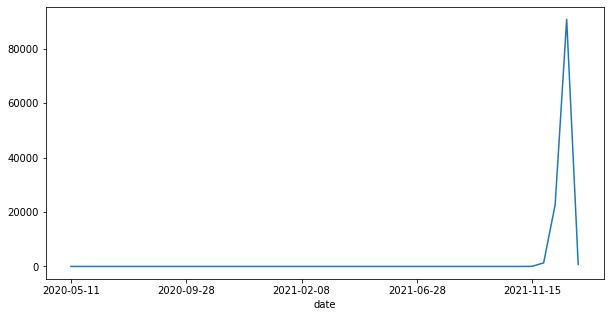

In [12]:
plt.figure(figsize = (10,5))
data_df.loc[data_df['variant'] == 'Omicron'].groupby('date')['num_sequences'].agg('sum').plot()

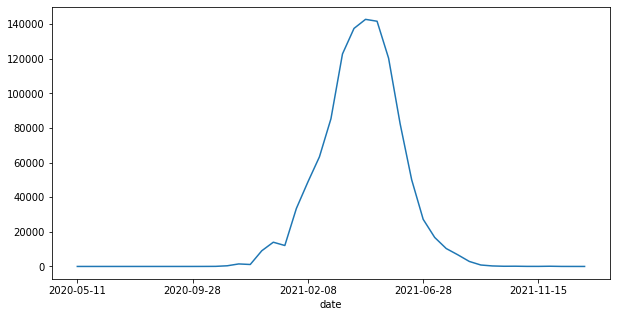

In [13]:
plt.figure(figsize = (10,5))
data_df.loc[data_df['variant'] == 'Alpha'].groupby('date')['num_sequences'].agg('sum').plot()

treemap which shows the number of cases in different location

In [14]:
renamed= data_df.rename(columns={"location":"Location","num_sequences_total":"Number of Cases"})
fig = px.treemap(renamed, path=[px.Constant('Number of Cases'),'Location'], values='Number of Cases',
                   hover_data=['Location'])
fig.show()

**By which covid virus variant dominates the area **

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

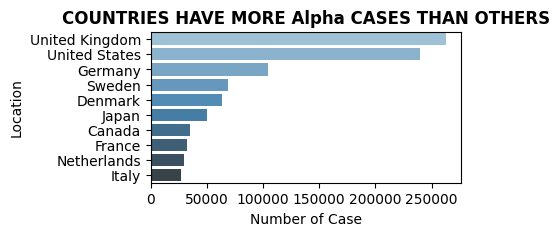

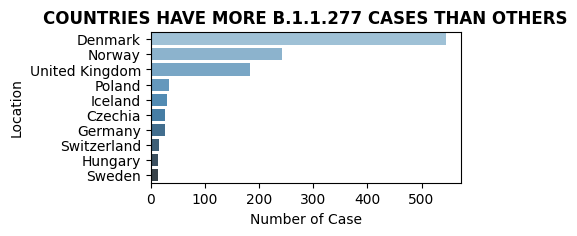

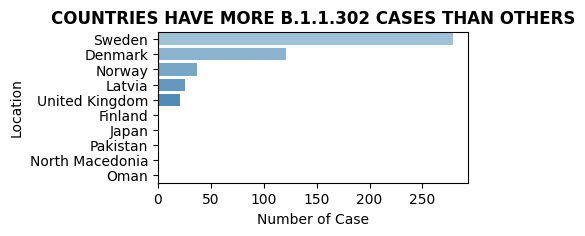

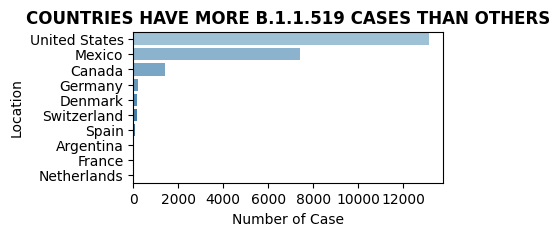

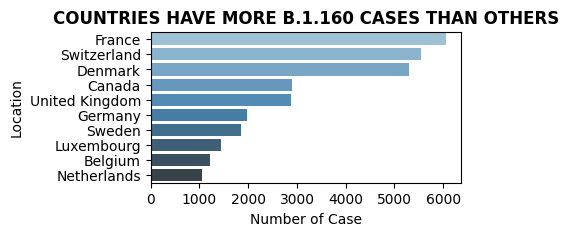

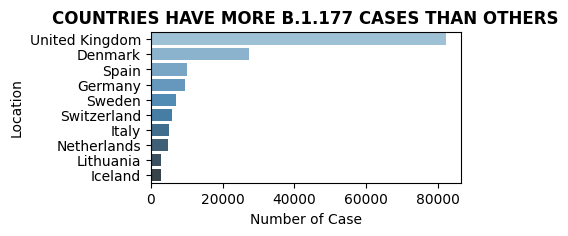

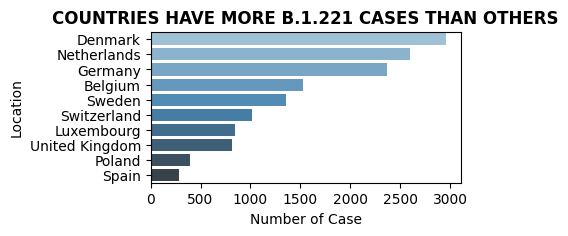

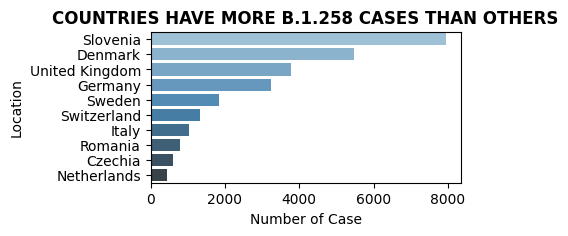

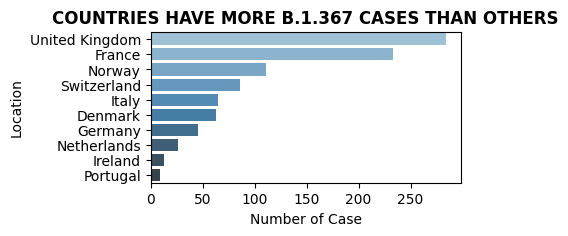

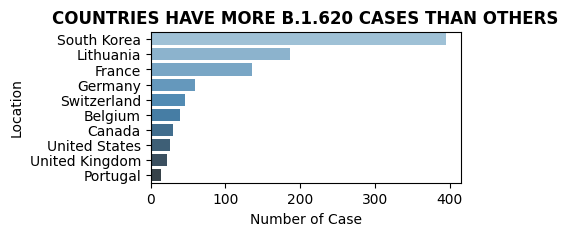

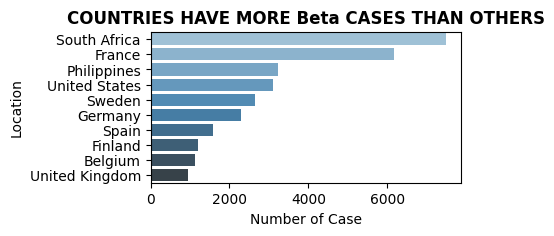

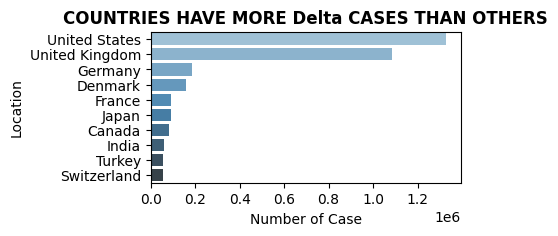

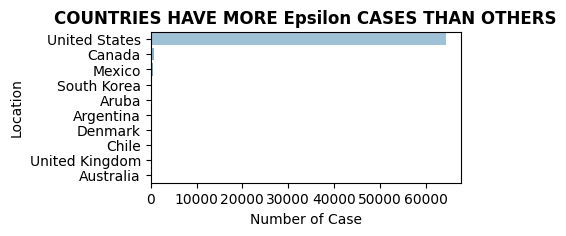

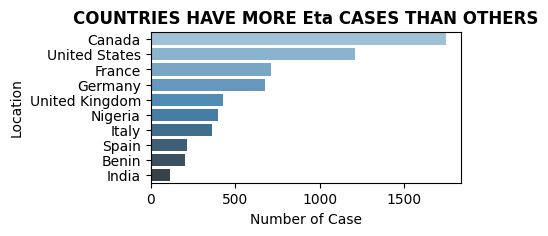

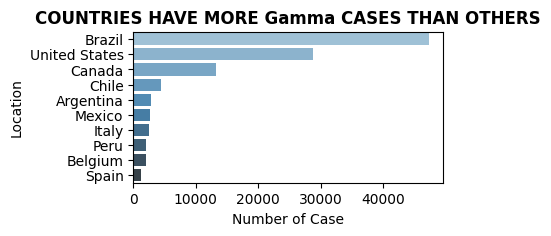

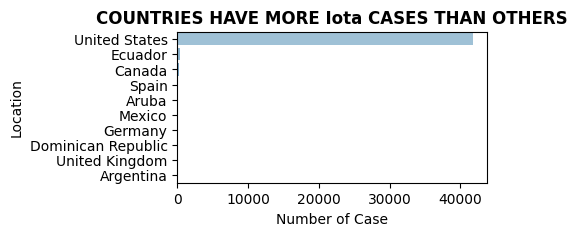

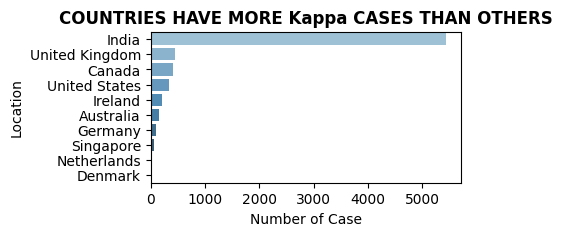

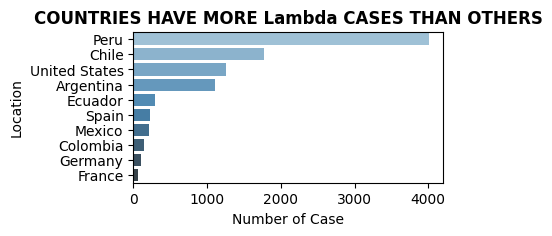

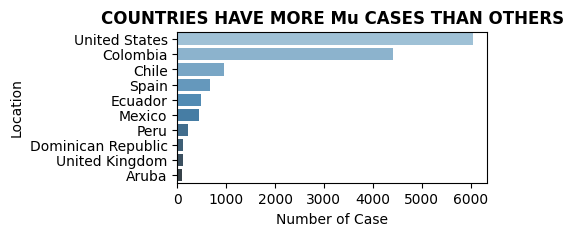

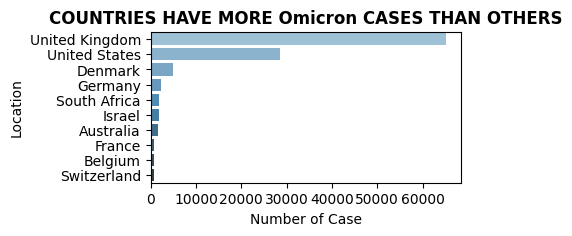

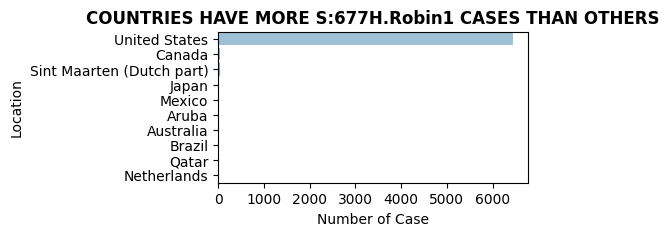

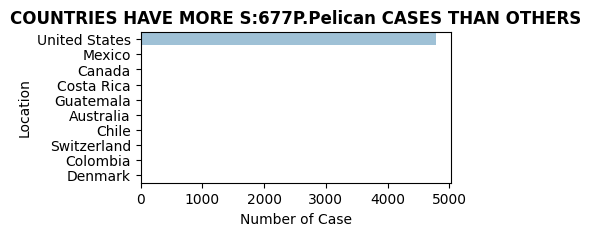

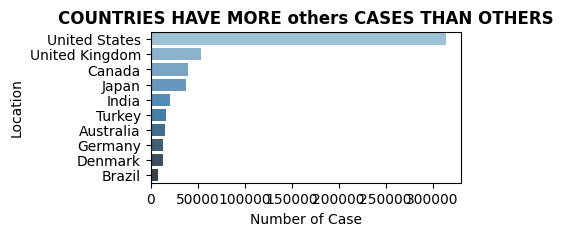

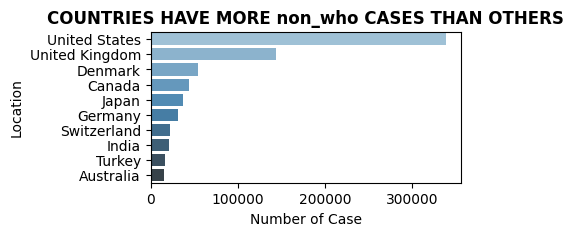

In [15]:
for virus in data_df.variant.unique():
    dataframe = data_df.loc[data_df['variant'] == virus].groupby('location')['num_sequences'].agg('sum').sort_values(ascending=False)[:10]
    dataframe = pd.DataFrame({'Location':dataframe.index, 'Number of Case':dataframe.values})
    plt.figure(figsize=(4,2),dpi=100)
    sns.barplot(y='Location',x="Number of Case",data=dataframe,palette="Blues_d")
    plt.title('COUNTRIES HAVE MORE {} CASES THAN OTHERS'.format(virus),loc='center',fontweight="bold")

** ABOUT INDIA**

In [16]:
india= data_df.loc[data_df.location=="India"]
india.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
36360,India,2020-05-11,Alpha,0,0.0,471
36361,India,2020-05-11,B.1.1.277,0,0.0,471
36362,India,2020-05-11,B.1.1.302,0,0.0,471
36363,India,2020-05-11,B.1.1.519,0,0.0,471
36364,India,2020-05-11,B.1.160,0,0.0,471


Graph which shows how india is effected by different variants

In [17]:
data=[]
for variant in india.variant.unique():
    var_df = india.loc[india.variant == variant]
    trace_variant = go.Scatter(
        x = var_df['date'],
        y = var_df['num_sequences_total'],
        name=variant,
        mode = "markers+lines"
    )
    data.append(trace_variant)
    


In [18]:
layout = dict(title = 'Total num sequences - India',
          xaxis = dict(title = 'Date', showticklabels=True), 
          yaxis = dict(title = 'Total num sequences'),
          hovermode = 'closest',
          height=300,
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='num-sequences-total-variant-date')

**ANALYSIS**

1.   India got highest number of kappa variant
2.   peak occurs in may 2021
3.   united states have maximum number of covid cases



